# Online Customer's Purchase Prediction Model

This dataset contains detailed information about online shopper sessions, with the goal of predicting the likelihood of a purchase based on various session behaviors. Collected from a year’s worth of real-time data from an e-commerce website, the dataset includes 12,330 sessions across 17 features.The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

The target variable in this dataset is Revenue, which indicates whether a visitor made a purchase during the session (True/False). This makes the dataset ideal for classification tasks, where the objective is to predict the likelihood of a purchase based on user behavior and session attributes.

By analyzing this dataset, we can identify key factors that influence purchasing decisions and provide insights into optimizing marketing strategies, website design, and customer experience to boost conversion rates.

## Data Preprocessing 

### Steps in Data Preprocessing

Step 1] - Import necessary libararies

Step 2] - Read Data Set

Step 3] - Sanity Check of Data

Step 4] - Exploratory Data Analysis [EDA]

Step 5] - Missing Value Treatments

Step 6] - Outliers Treatments

Step 7] - Duplicates and Garbage Value treatment

Step 8] - Normalization

Step 9] - Encoding of Data

Step 10] - Feature Selection

### Step 1 : Import Necessary Libraries

In [2]:
import warnings 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.metrics import accuracy_score, classification_report
warnings.filterwarnings('ignore') 

### Step 2 : Read Dataset

In [3]:
df=pd.read_csv('online_shoppers_intention.csv')

In [4]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


### Step 3 : Sanity Check of Data

In [5]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [7]:
shape=df.shape
shape

(12330, 18)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [9]:
df.isnull()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12326,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12327,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12328,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
null=df.isnull().sum() # checking for null values
null

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [11]:
null/shape[0]*100 # checking for null percentages

Administrative             0.0
Administrative_Duration    0.0
Informational              0.0
Informational_Duration     0.0
ProductRelated             0.0
ProductRelated_Duration    0.0
BounceRates                0.0
ExitRates                  0.0
PageValues                 0.0
SpecialDay                 0.0
Month                      0.0
OperatingSystems           0.0
Browser                    0.0
Region                     0.0
TrafficType                0.0
VisitorType                0.0
Weekend                    0.0
Revenue                    0.0
dtype: float64

Thus, it is evident that there is no null values.

In [12]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [13]:
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [14]:
df['Revenue'].value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

In [15]:
#Identifying Garbage Value
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*15)

Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64
*********************************************
VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64
*********************************************


In [16]:
# Checking unique values in 'Month'
print(df['Month'].unique())

['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']


In [17]:
# Checking unique values in 'VisitorType'
print(df['VisitorType'].unique())

['Returning_Visitor' 'New_Visitor' 'Other']


In [18]:
# Investigating 'Other' category in VisitorType
df[df['VisitorType'] == 'Other']

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
5679,0,0.00,4,225.766667,222,9630.209524,0.053355,0.066159,0.0,0.0,June,8,13,9,5,Other,False,False
8006,5,446.25,0,0.000000,18,815.250000,0.000000,0.002500,0.0,0.0,Dec,8,13,9,20,Other,False,False
8105,0,0.00,0,0.000000,8,493.750000,0.000000,0.050000,0.0,0.0,Nov,2,2,4,20,Other,False,False
8115,0,0.00,0,0.000000,7,87.000000,0.000000,0.028571,0.0,0.0,Dec,8,13,9,20,Other,False,False
8187,0,0.00,0,0.000000,4,129.500000,0.000000,0.050000,0.0,0.0,Dec,8,13,9,20,Other,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12156,0,0.00,0,0.000000,1,0.000000,0.000000,0.100000,0.0,0.0,Dec,8,13,9,20,Other,False,False
12185,0,0.00,0,0.000000,1,0.000000,0.200000,0.200000,0.0,0.0,Dec,8,13,9,20,Other,False,False
12219,0,0.00,0,0.000000,6,199.250000,0.000000,0.033333,0.0,0.0,Dec,2,4,1,3,Other,False,False
12243,3,18.00,0,0.000000,2,8.000000,0.000000,0.050000,0.0,0.0,Dec,8,13,9,20,Other,False,False


## Step 4 : Exploratory Data Analysis

In [19]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [20]:
df.describe(include='object')

,Month,VisitorType
count,12330,12330
unique,10,3
top,May,Returning_Visitor
freq,3364,10551


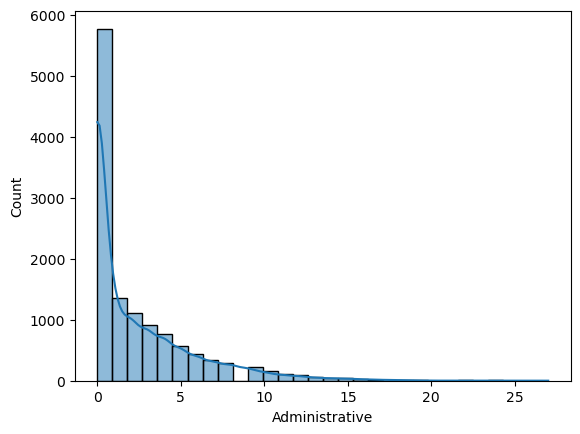

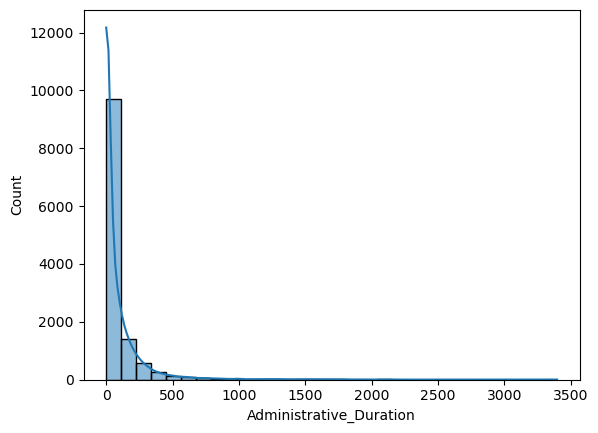

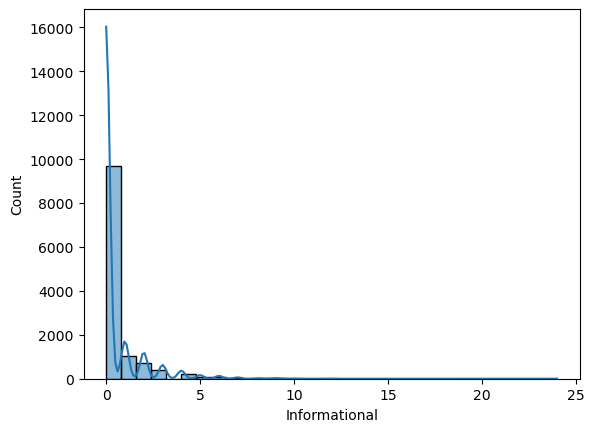

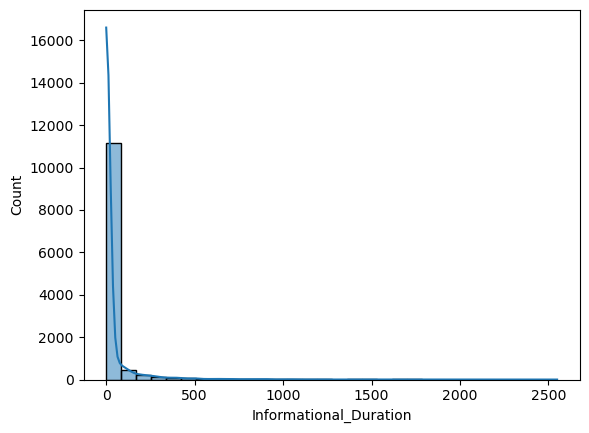

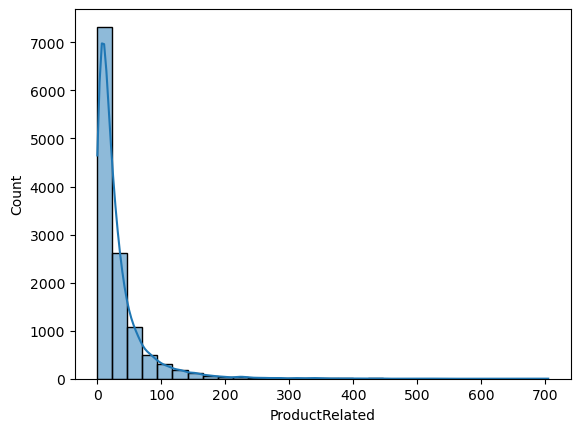

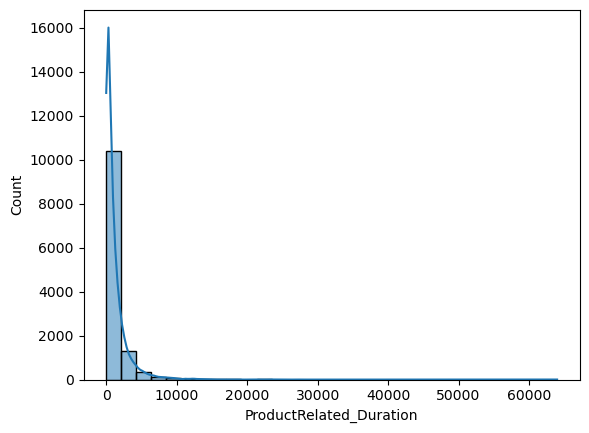

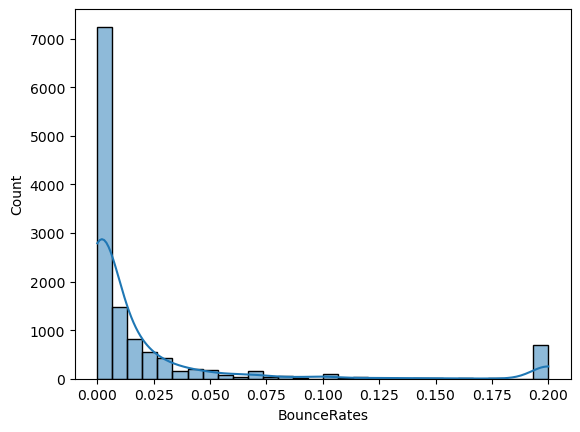

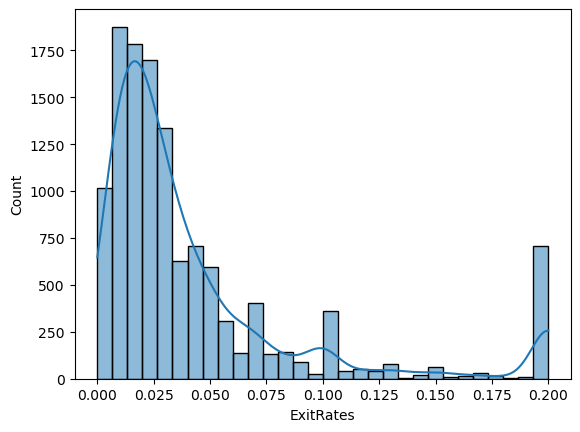

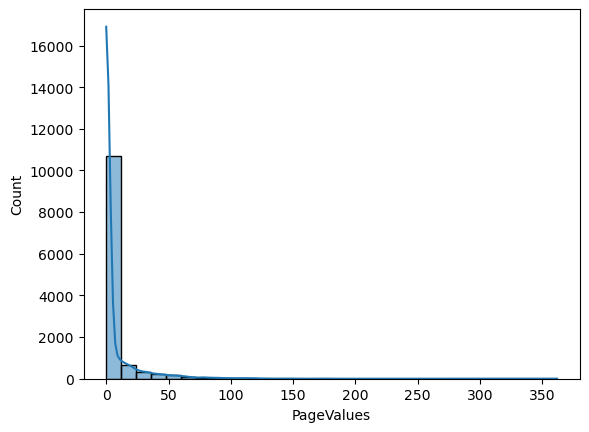

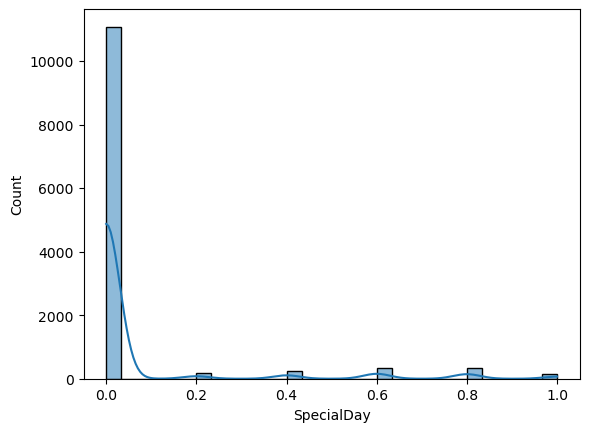

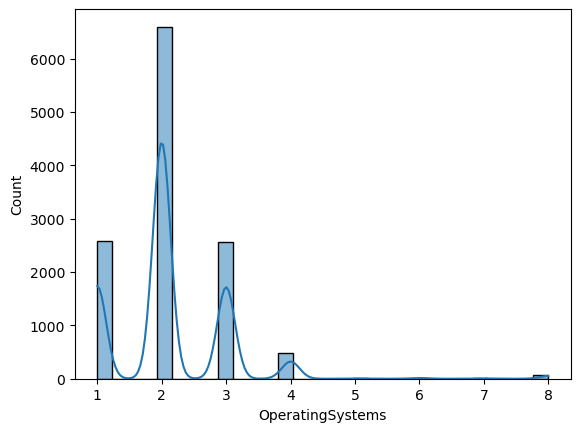

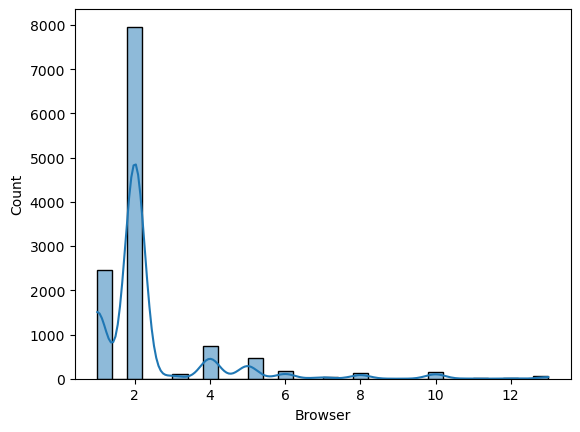

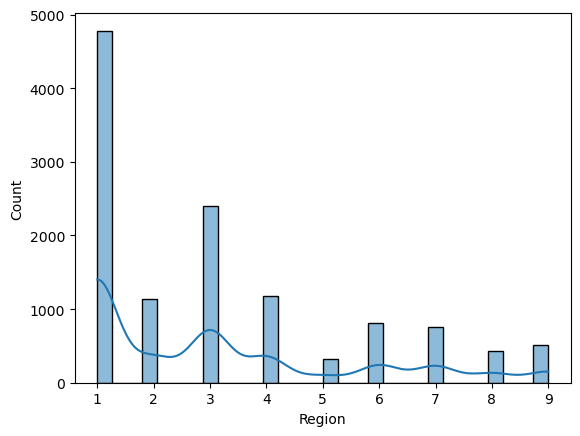

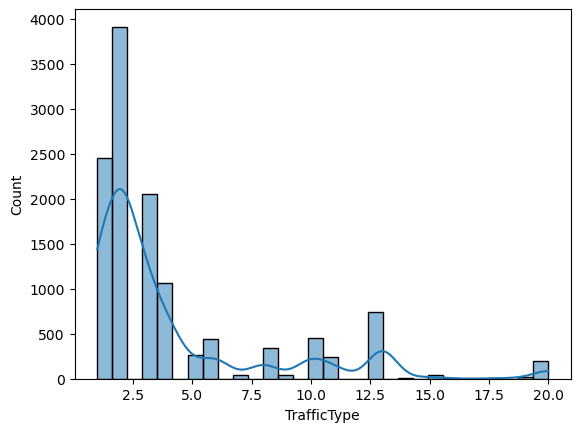

In [21]:
#Histogram to understand the distribution 
import warnings as wr
wr.filterwarnings("ignore")

for i in df.select_dtypes(include="number").columns:
  sns.histplot(data=df,x=i,bins=30,kde='True')
  plt.show()


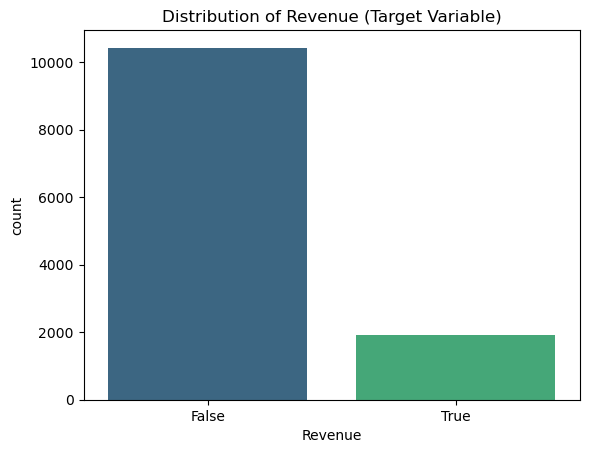

In [22]:
sns.countplot(data=df, x='Revenue', palette='viridis')
plt.title('Distribution of Revenue (Target Variable)')
plt.show()

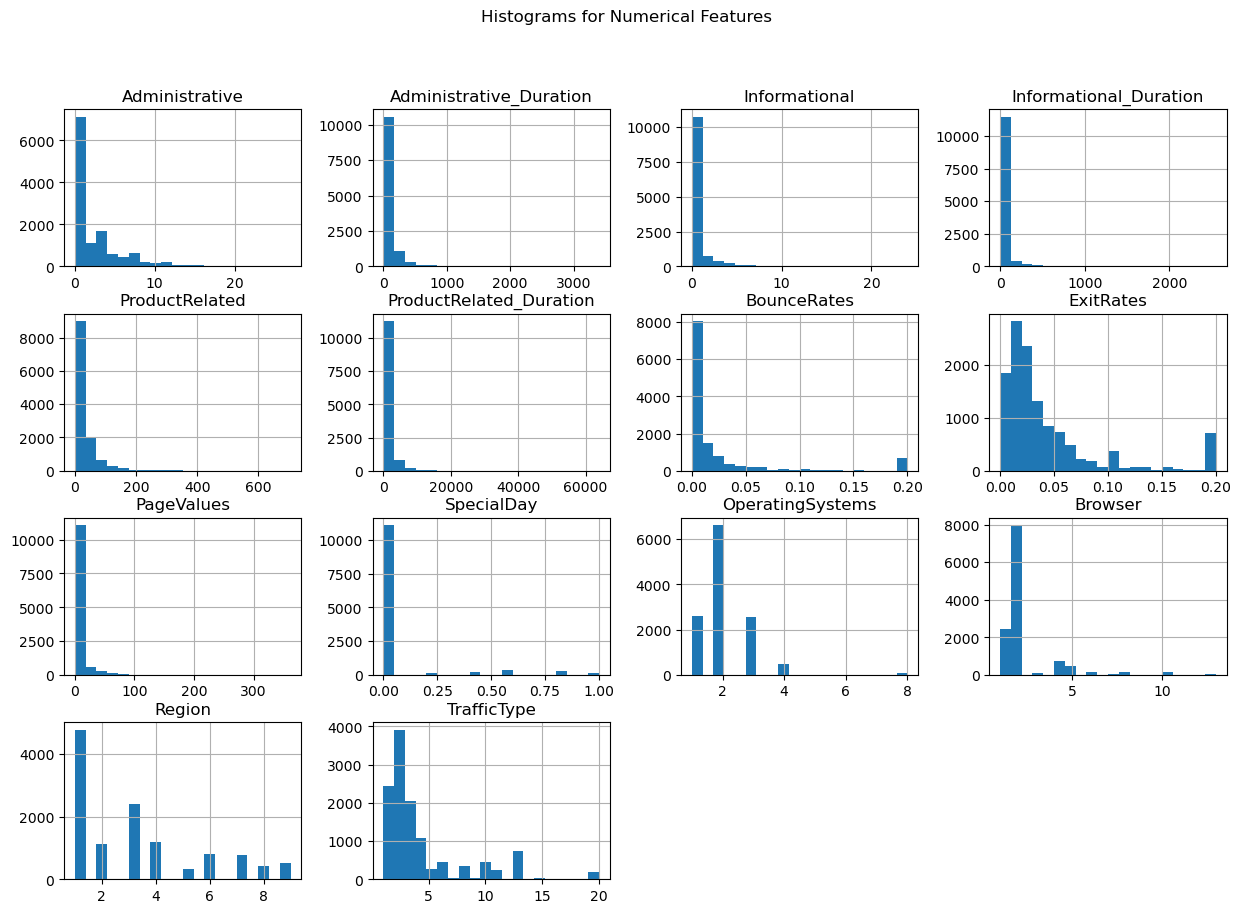

In [23]:
df.hist(figsize=(15, 10), bins=20)
plt.suptitle('Histograms for Numerical Features')
plt.show()

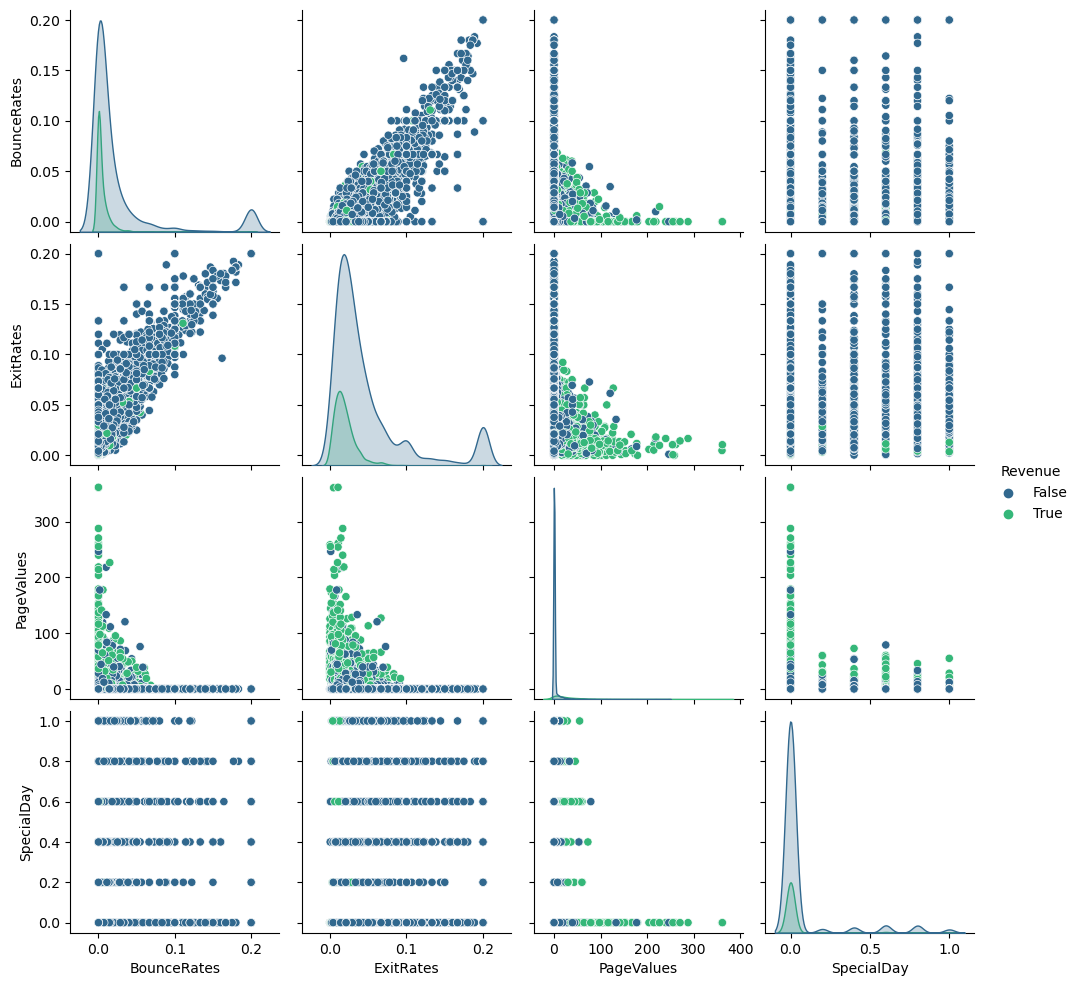

In [24]:
numerical_columns = ['BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
sns.pairplot(df, vars=numerical_columns, hue='Revenue', palette='viridis')
plt.show()

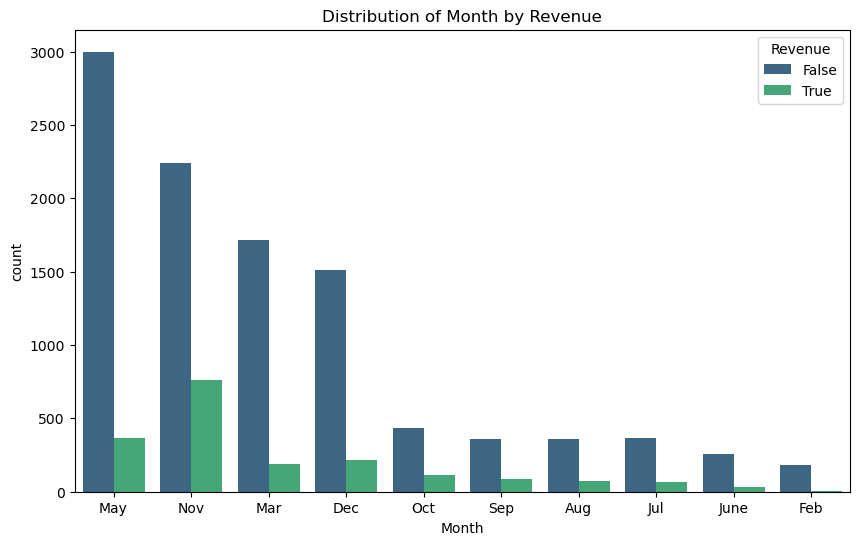

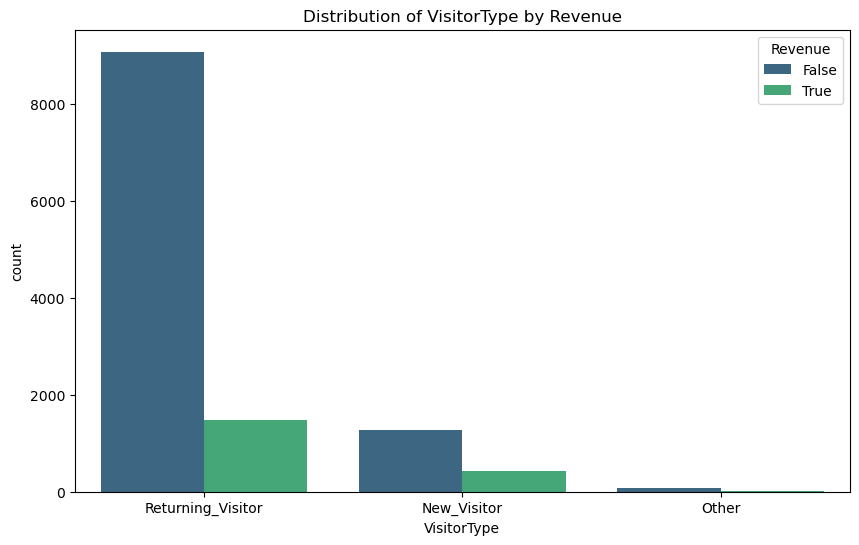

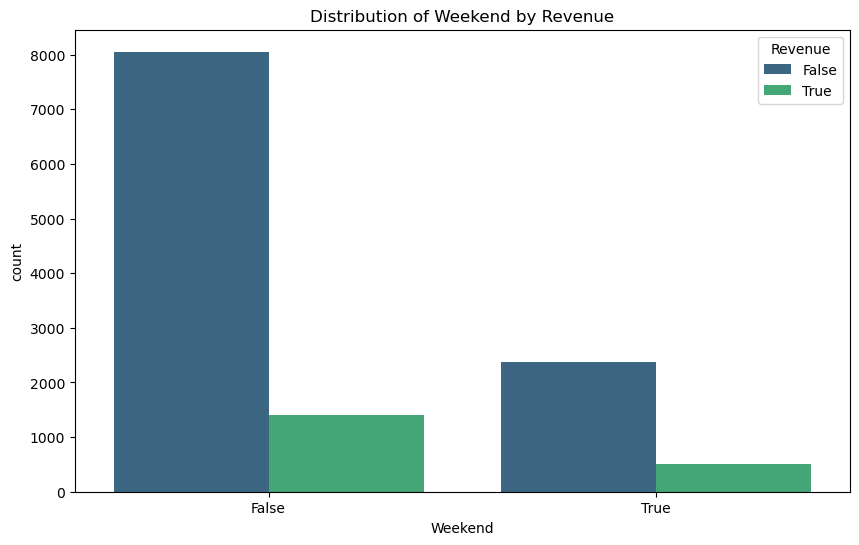

In [28]:
df['Weekend'] = df['Weekend'].astype(str)
df['Revenue'] = df['Revenue'].astype(str)
categorical_columns = ['Month', 'VisitorType', 'Weekend']
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue='Revenue', palette='viridis', order=df[col].value_counts().index)
    plt.title(f'Distribution of {col} by Revenue')
    plt.show()

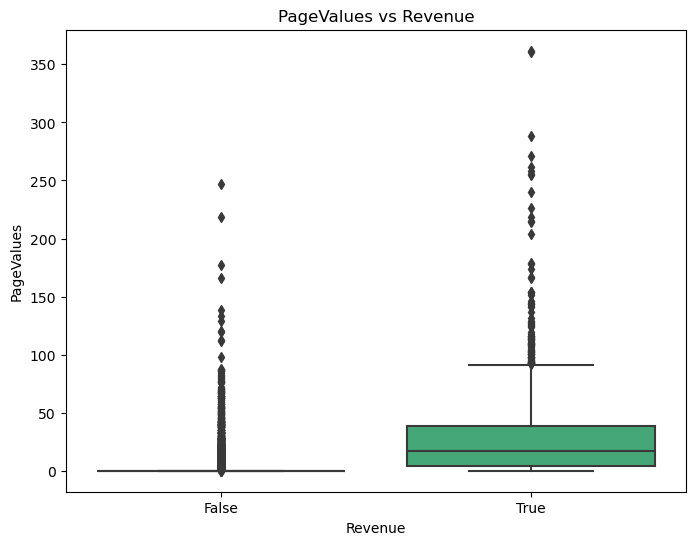

In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Revenue', y='PageValues', palette='viridis')
plt.title('PageValues vs Revenue')
plt.show()

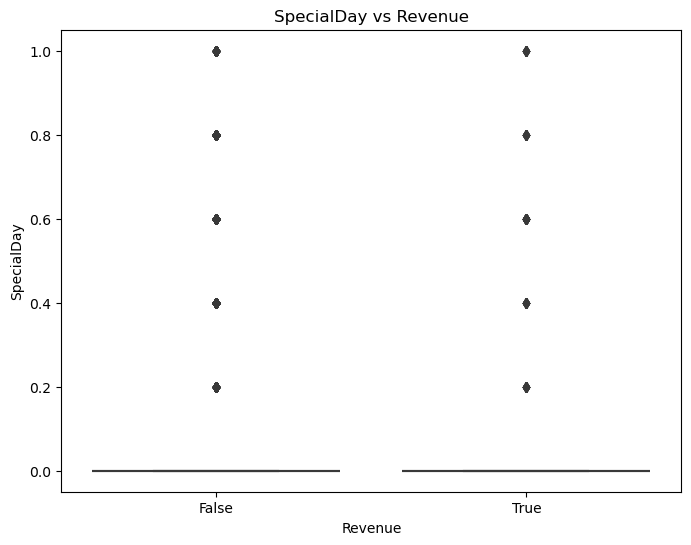

In [33]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Revenue', y='SpecialDay', palette='viridis')
plt.title('SpecialDay vs Revenue')
plt.show()

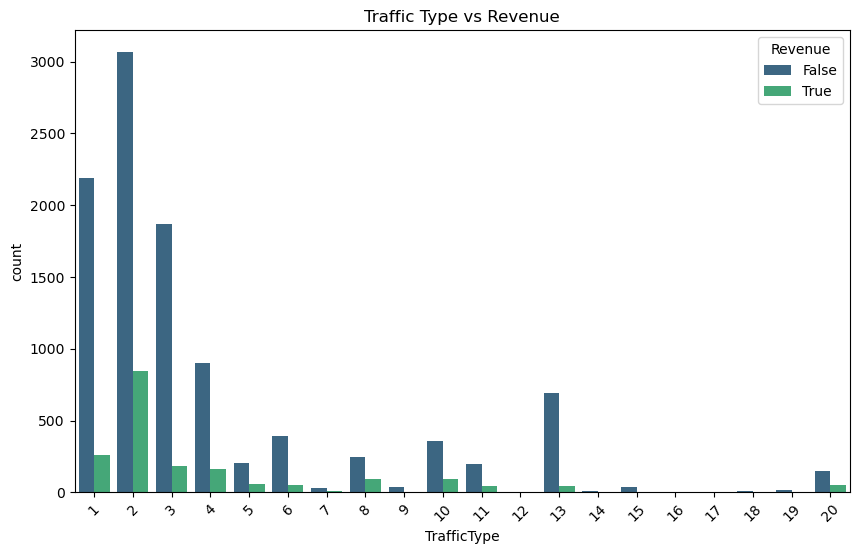

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TrafficType', hue='Revenue', palette='viridis')
plt.title('Traffic Type vs Revenue')
plt.xticks(rotation=45)
plt.show()


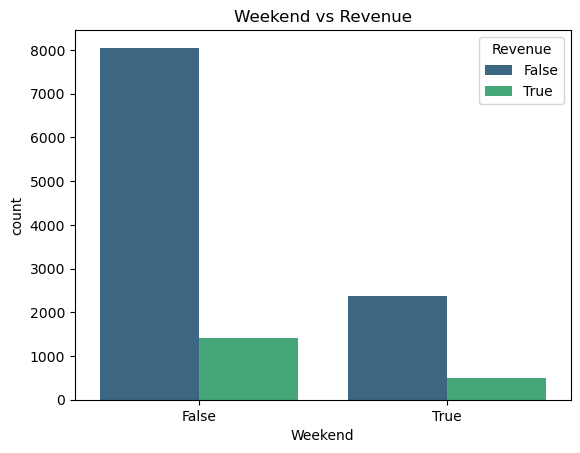

In [35]:
sns.countplot(data=df, x='Weekend', hue='Revenue', palette='viridis')
plt.title('Weekend vs Revenue')
plt.show()

In [39]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr=numeric_df.corr()
corr

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301


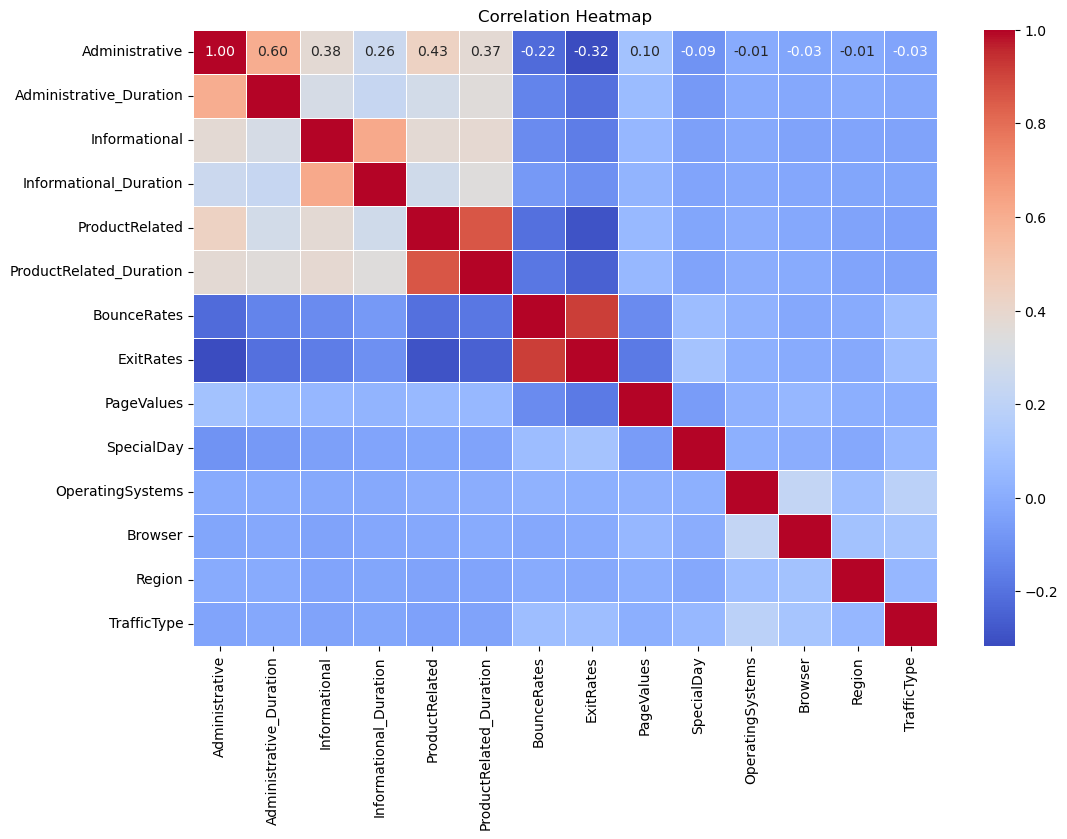

In [40]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## Step 5 : Missing Value Treatments

No missing values ,duplicates found.

##  Step 6 : Outliers Treatment

In [42]:
# Function to get outliers using IQR method and filter out outliers or trim
def get_IQR_outliers(df, column, filter=False):
    if column not in df.columns:               # Check if the column exists in the DataFrame
        raise ValueError(f"Column '{column}' is not in DataFrame and the DataFrame columns are :{df.columns}")

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_mask =  (df[column] < lower_bound) | (df[column] > upper_bound)
    if filter:                    # if the filter is true
        return df[~outliers_mask] # return outlier filtered dataframe
    else:                         # if the filter is false
        return df[outliers_mask]  # return dataframe of outliers


#### Z-Score

In [44]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [43]:
# Function to get outliers using Zscore method and filter out outliers or trim
def get_zscore_outliers(df, column, threshold=3, filter=False):
    if column not in df.columns:               # Check if the column exists in the DataFrame
        raise ValueError(f"Column '{column}' is not in DataFrame and the DataFrame columns are :{df.columns}")

    x = df[column]                             # Extract the specified column from the DataFrame
    mean = x.mean()                            # Calculate the mean of the column
    standard_deviation = x.std()               # Calculate the standard deviation of the column
    z_scores = (x - mean) / standard_deviation # Calculate Z-scores for each value in the column
    outliers_mask = ((z_scores < -1* threshold) | (z_scores > threshold))
    if filter:                                 # if filter is True
        return df[~outliers_mask]              # return outlier filtered dataframe
    else:                                      # if filter is false
        return df[outliers_mask]               # return outlier dataframe

#### Loop through each numeric column and apply the Z-score outlier treatment



In [46]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
tdf = df.copy()
for column in numeric_columns:
    tdf = get_zscore_outliers(tdf, column, threshold=3, filter=True)

In [47]:
tdf.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False
10,0,0.0,0,0.0,3,395.000000,0.000000,0.066667,0.0,0.0,Feb,1,1,3,3,Returning_Visitor,False,False


In [49]:
tdf.shape

(8893, 18)

In [50]:
df.shape

(12330, 18)

## Step 7 : Encoding Categorical Data

In [53]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Revenue'] = label_encoder.fit_transform(df['Revenue'])
df['Weekend'] = label_encoder.fit_transform(df['Weekend'].astype(str))

In [56]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,0,0


In [68]:
# Apply One-Hot Encoding to categorical columns
df_encoded = pd.get_dummies(df, columns=['Month', 'VisitorType', 'TrafficType'], drop_first=True)

# Check the DataFrame after encoding
print(df_encoded.head())

   Administrative  Administrative_Duration  Informational  \
0       -0.696993                -0.457191      -0.396478   
1       -0.696993                -0.457191      -0.396478   
2       -0.696993                -0.457191      -0.396478   
3       -0.696993                -0.457191      -0.396478   
4       -0.696993                -0.457191      -0.396478   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.244931       -0.691003                -0.624348   
1               -0.244931       -0.668518                -0.590903   
2               -0.244931       -0.691003                -0.624348   
3               -0.244931       -0.668518                -0.622954   
4               -0.244931       -0.488636                -0.296430   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  TrafficType_11  \
0     3.667189   3.229316   -0.317178   -0.308821  ...           False   
1    -0.457683   1.171473   -0.317178   -0.308821  ...          

## Step 7 : Feature Selection & Scaling

In [70]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Separate the target variable 'Revenue' and features
X = df_encoded.drop('Revenue', axis=1)
y = df_encoded['Revenue']

# Initialize RandomForest model for RFE
model = RandomForestClassifier()

# Apply RFE to select the top features
selector = RFE(model, n_features_to_select=5)
selector = selector.fit(X, y)

# Get the selected features
selected_features = X.columns[selector.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['Administrative_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'ExitRates', 'PageValues'],
      dtype='object')


In [71]:
from sklearn.preprocessing import StandardScaler

# Select the features from the selected columns
X_selected = X[selected_features]

# Apply Standard Scaling to the selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Convert the scaled data back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=selected_features)

# Check the scaled data
print(X_scaled_df.head())


   Administrative_Duration  ProductRelated  ProductRelated_Duration  \
0                -0.457191       -0.691003                -0.624348   
1                -0.457191       -0.668518                -0.590903   
2                -0.457191       -0.691003                -0.624348   
3                -0.457191       -0.668518                -0.622954   
4                -0.457191       -0.488636                -0.296430   

   ExitRates  PageValues  
0   3.229316   -0.317178  
1   1.171473   -0.317178  
2   3.229316   -0.317178  
3   1.994610   -0.317178  
4   0.142551   -0.317178  
